# Проверка адекватности моделей


Задание: Проверить адекватность полученных ранее (на семинаре 5) моделей, построить графики исходных и полученных данных, построить Boxplot и скрипичные диаграммы исходных и полученных данных, проверить адекватность полученных моделей с помощью критерия, Фишера, Стьюдента. Произвести выбор модели на основе полученных результатов.



> Дописать комментарии f-тест и к диаграммам, выбрать итоговую модель



## Методы оценки

### 1. Визуальный анализ и оценка отклонений (диаграммы размаха)

1. Можно визуально сравнить выборку и прогнозные значения на линейном графике и сделать выводы о том, насколько эти значения близки.
2. Использовать "ящик с усами"(boxplot). Подробно о построении и интерпретации см. материалы семинара 1.


### 2. Проверка адекватности в задачах регрессии (критерии согласия)

#### Статистические критерии

**Определение**:

Пусть $x_1, x_2, .., x_n$ - независимые наблюдения случайно величины с функцией распределения $F(x)$, которая нам не известна. Предположим, что нам нужно проверить гипотезу:

$H_0: F(x) =F_0(X),$

где $F_0(x)$ - некоторая заданная функция распределения, которая может быть непрерывной или дискретной. Иными словами, мы проверяем, что генеральная совокупность, из которой получена выборка, распределена по определенному закону.  

$𝐻_1$:  генеральная совокупность распределена по другому закону.

Задача проверки такой гипотезы называется задачей *проверки согласия*, а критерии, используемые для этого, *критериями согласия*.

**В регрессионном анализе критерии согласия позволяют оценивать значимость регрессионных моделей.**

Наша конечная цель — определить статистическую значимость наших результатов.

Чтобы узнать, является ли утверждение обоснованным или нет, мы будем использовать p-значение (p-value).

Чем ниже значение p, тем более неожиданными являются доказательства, тем более нелепой выглядит наша нулевая гипотеза. И что мы делаем, когда чувствуем себя нелепо с нашей нулевой гипотезой? Мы отвергаем ее и выбираем нашу альтернативную гипотезу.

ИТОГО: Нулевая гипотеза ($H_0$) принимается, когда значение p-value **превышает** установленный уровень значимости, обычно равный 0.05 (или 0,01, 0,1 и др.). Это означает, что вероятность получения наблюдаемых данных (или более экстремальных) при условии, что нулевая гипотеза верна, достаточно высока, и нет достаточных оснований для её отклонения.

*Если вообще ничего об этом не помните, почитатйте эту статью https://habr.com/ru/companies/skillfactory/articles/510688/*

*Если не хотите читать статью, но не помните что такое ***p-value***, посмотрите видео, где объясняют этот термин на щеночках* 🐶 *https://www.youtube.com/watch?v=9jW9G8MO4PQ*


##### Критерий Пирсона (критерий $χ^2$)

Статистический критерии согласия Пирсона используют следующие нулевую и альтернативную гипотезы:

$H_0$ : (нулевая гипотеза) Модель не объясняет вариацию зависимой переменной (все коэффициенты равны нулю).

$H_1$ : (альтернативная гипотеза) Модель объясняет вариацию зависимой переменной (по крайней мере один коэффициент не равен нулю).

Мы используем следующую формулу для расчета статистики критерия хи-квадрат, $\chi^2$ ,

$\chi^2 = \sum_{i=1}^k \frac {(y_i - y_i^*)^2}{y_i^*}$, где $k$ - количество проверяемых значений.

Если **p-value**, соответствующее тестовой статистике $\chi^2$, меньше выбранного вами уровня значимости, то вы можете отвергнуть нулевую гипотезу.

##### Критерий Фишера

Критерий Фишера, также известный как F-критерий, применяется в статистике для проверки гипотез о равенстве дисперсий двух или более выборок.

Точный тест Фишера использует следующие нулевые и альтернативные гипотезы:

$H_0$ : Дисперсии двух выборок равны.

$H_1$ : Дисперсии двух выборок не равны. Это предполагает, что существует статистически значимое различие в вариации данных между группами.

В задаче регрессии этот критерий позволяет определить, насколько хорошо модель объясняет вариацию зависимой переменной по сравнению с вариацией, которая не объясняется моделью.

F-критерий рассчитывается как $F = \frac{s_1^2} {s_2^2}$, где $s_1^2, s_2^2$ - выборочные оценки дисперсий двух выборок.

Если p-value меньше уровня значимости, то нулевая гипотеза отвергается.

##### Критерий Стьюдента (t-тест)

Проверка гипотезы о равенстве средних для парных (связных) выборок.

**Условия применения**:
- Данные должны быть нормально распределены.
- Выборки должны быть зависимыми, то есть каждая пара наблюдений должна быть связана (например, измерения одного и того же объекта до и после вмешательства).

$H_0$ : Средняя разница между парами равна нулю. Это означает, что нет статистически значимых различий между средними значениями двух связанных выборок.

$H_1$ : Средняя разница между парами не равна нулю.

t-статистика рассчитывается как отношение оцененного коэффициента к его стандартной ошибке:

$t =\frac{\bar{d}}{s_d / \sqrt{n}} $,

где $\bar{d}$ - средняя разница между парами, $s_d$ - стандартное отклонение разностей, $n$ - количество наблюдений.

Если **p-value меньше заданного уровня значимости**, то нулевая гипотеза отвергается. Это означает, что разница между средними значениями статистически значима.

### 3. Метрики

В случае если планируется делать обобщения и использовать модель на других данных, то необходимы множественная проверка результатов модели на различных данных. Для этого используют так называемые метрики качества модели.

1. **Коэффициент детерминации R^2** показывает долю дисперсии целевой переменной, объясненную моделью.

$R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - f(x_i))^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}.$ В числителе - сумма квадратов ошибок предсказаний, в знаменателе - сумма квадратов разностей $y$ со средним значением.

|Значение коэффициента | Интерпретация |
|-----|-----|
|$R^2 = 0$| $\sum_{i=1}^{N} (y_i - f(x_i))^2 = \sum_{i=1}^{N} (y_i - \bar{y})^2$|
|$R^2 < 0$| Очень плохая модель!|
|$R^2 > 0.8$| Хорошая модель!|
|$R^2 = 1$| Либо абсолютно тесная линейная зависимость $y$ от $x$, либо ошибка в расчётах|

2. **MSE (Mean Square Error)** - Среднеквадратичная ошибка. Одна из самых популярных метрик в задаче регрессии.

$MSE(y^{true}, y^{pred}) = \frac1N\sum_{i=1}^{N} (y_i - f(x_i))^2$

Иногда для того, чтобы показатель эффективности MSE имел размерность исходных данных, из него извлекают квадратный корень и получают показатель эффективности **RMSE**.

$RMSE = \sqrt{MSE}$

3. **MAE(mean absolute error)** - Средняя абсолютная ошибка

Использовать RMSE для сравнения моделей на выборках с большим количеством выбросов может быть неудобно. В таких случаях прибегают к также знакомой вам в качестве функции потерь метрике MAE (mean absolute error):

$MAE(y^{true}, y^{pred}) = \frac{1}{N}\sum_{i=1}^{N} \left|y_i - f(x_i)\right|$

4. **MAPE(mean absolute percentage error)** - Средняя абсолютная ошибка в процентах

В метрике MAPE (mean absolute percentage error) в знаменатель помещают целевое значение:

$MAPE(y^{true}, y^{pred}) = \frac{1}{N} \sum_{i=1}^{N} \frac{ \left|y_i - f(x_i)\right|}{\left|y_i\right|}$


### Применение показателей качества модели

1. В качестве функции потерь: RSS (сумма квадратов ошибок),  MSE
2. Оценка качества модели на обучающей выборке: $R^2$
3. Оценка качества модели на тестовой выборке: RMSE,  MAE ,  MAPE


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/bikes.csv', sep=',')

n1 = 101
n2 = 300

df['lag'] = df['count'].iloc[n1-1:n2].shift(1).copy()
df = df[n1:n2].copy().reset_index(drop=True)

# сделаем колонку "hours", дату переведём в дни
df['datetime'] = df['datetime'].astype('datetime64[ns]')
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d")
df['hours'] = (df['datetime'] - df['datetime'].iloc[0]).dt.total_seconds() / (60*60)
df['hours'] -= df['hours'].iloc[0] - 1

# признаки и таргет
X = df[['atemp', 'humidity', 'windspeed', 'hours']]
y = df['count']
X.head()

,atemp,humidity,windspeed,hours
0,9.850,37,22.0028,1.0
1,11.365,33,22.0028,2.0
2,11.365,33,22.0028,3.0
3,12.880,30,19.9995,4.0
4,14.395,28,12.9980,5.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,lag,hours
count,199,199.0,199.0,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2011-01-09 15:46:44.020100352,1.0,0.0,0.758794,1.396985,7.194573,8.820980,51.582915,15.317244,2.894472,53.306533,56.201005,56.628141,102.778894
min,2011-01-05 10:00:00,1.0,0.0,0.000000,1.000000,3.280000,3.030000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2011-01-07 13:30:00,1.0,0.0,1.000000,1.000000,5.740000,6.820000,40.000000,8.998100,0.000000,17.000000,17.500000,17.500000,52.500000
50%,2011-01-09 15:00:00,1.0,0.0,1.000000,1.000000,7.380000,9.090000,50.000000,15.001300,2.000000,46.000000,48.000000,49.000000,102.000000
75%,2011-01-11 18:30:00,1.0,0.0,1.000000,2.000000,8.200000,10.605000,55.000000,22.002800,4.000000,73.500000,76.500000,77.500000,153.500000
max,2011-01-13 22:00:00,1.0,0.0,1.000000,3.000000,12.300000,15.910000,93.000000,39.000700,20.000000,216.000000,219.000000,219.000000,205.000000
std,NaN,0.0,0.0,0.428894,0.593050,1.770275,2.514817,14.863416,8.926630,3.582212,47.749044,49.359737,49.499438,59.346282


In [ ]:
print(stats.shapiro(y_test))

ShapiroResult(statistic=0.9049945886194074, pvalue=0.0026801009562276183)


### МНК



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(X_train), np.array(y_train))
res_mnk = model.predict(np.array(X_test))

#### Визуальный анализ


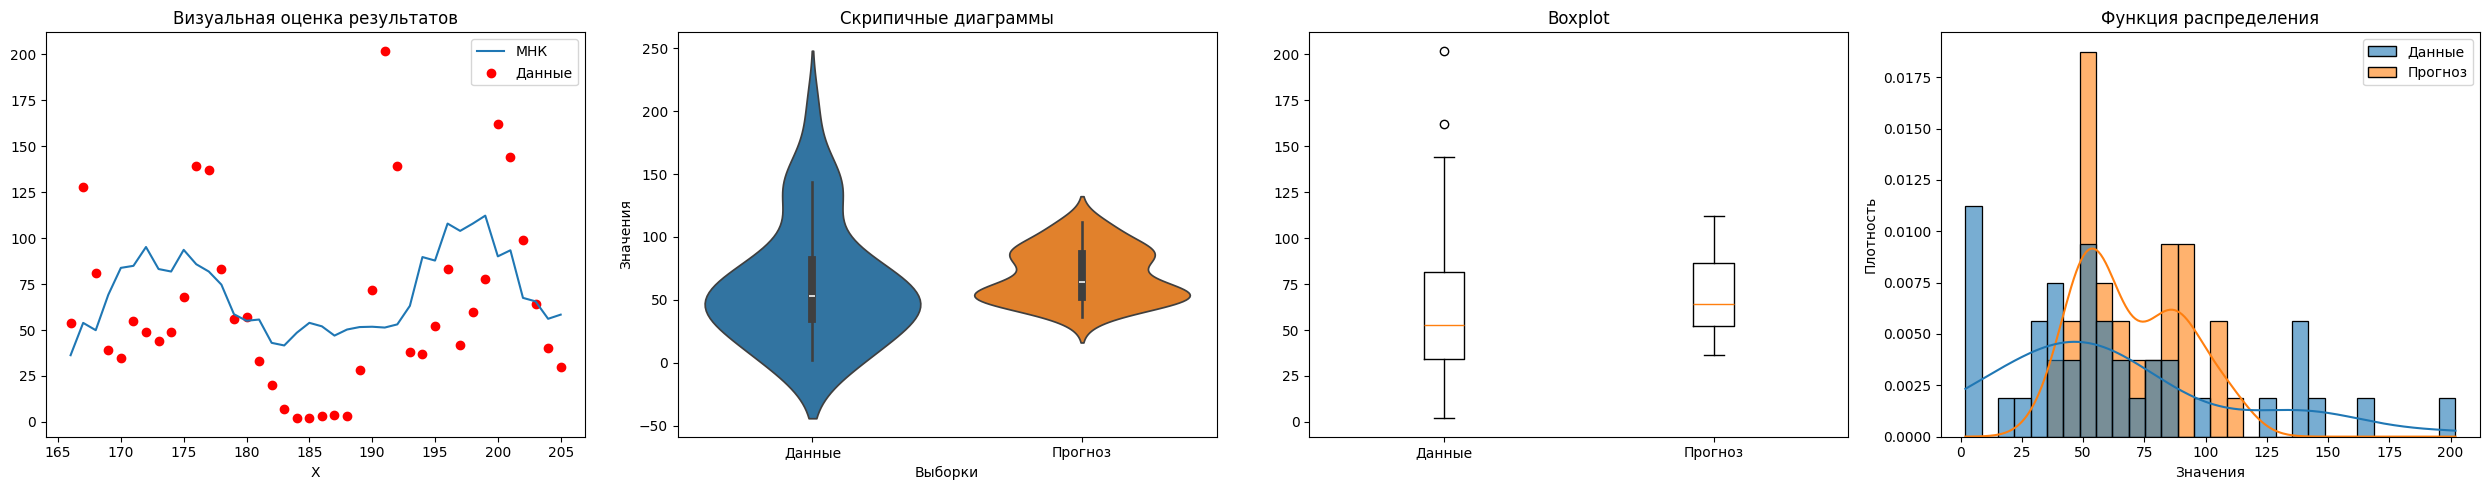

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs[0].plot(X_test['hours'], res_mnk, label='МНК')
axs[0].scatter(X_test['hours'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': res_mnk
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

axs[2].boxplot([ y_test, res_mnk])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'Прогноз'])

sns.histplot(data, bins=30, kde=True, stat='density', color='blue', alpha=0.6, ax=axs[3])
axs[3].set_title('Функция распределения')
axs[3].set_ylabel('Плотность')
axs[3].set_xlabel('Значения')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

По графиками можно сравнить характеристики разброса значений:

Медианные значения прогноза немного выше, границы квантилей сдвинуты, "границы усов" — границы статистически значимой выборки, тоже сдвинуты, разброс значений по прогнозу меньше, чем реальные значения, в исходных данных наблюдаются выбросы.

Плотность прогнозируемых данных имеет менее высокую дисперсию, тогда как среднее значение по группам кажется приблизительно одинаковым.

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [ ]:
from scipy.stats import stats

# Приведение y_test к той же сумме, что и res_mnk
y_test_normalized = y_test / np.sum(y_test) * np.sum(res_mnk)

# Выполнение теста согласия Пирсона
chi2_statistic, p_value = stats.chisquare(f_obs=res_mnk, f_exp=y_test_normalized)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается: выборки имеют разные распределения.")
else:
    print("Нулевая гипотеза не отвергается: выборки имеют схожие распределения.")

Статистика хи-квадрат: 4957.8181502149655
p-value: 0.0
Нулевая гипотеза отвергается: выборки имеют разные распределения.


<ipython-input-10-4538432f0b45>:7: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_statistic, p_value = stats.chisquare(f_obs=res_mnk, f_exp=y_test_normalized)


In [ ]:
# тест Фишера

# Выполнение F-теста
f_statistic, p_value = stats.f_oneway(res_mnk, y_test)

# Вывод результатов
print(f"Статистика F: {f_statistic}")
print(f"P-значение: {p_value}")

Статистика F: 0.675905241300195
P-значение: 0.41350643818703525


<ipython-input-11-cd42cda3ee14>:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_statistic, p_value = stats.f_oneway(res_mnk, y_test)


In [ ]:
#парный t-тест Стьюдента

t_statistic, p_value = stats.ttest_rel(y_test, res_mnk)
print(f"Результат t-теста: {t_statistic}")
print(f"p-value: {p_value}")

Результат t-теста: -0.9138914379164178
p-value: 0.3663895547570444


<ipython-input-12-3ebadbe5421d>:3: DeprecationWarning: Please import `ttest_rel` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic, p_value = stats.ttest_rel(y_test, res_mnk)


Результат t-теста: -0.91 указывает на то, что среднее исходных значений ниже среднего предсказанных

p-value: 0.3664 > 0.05, поэтому нет оснований отвергнуть нулевую гипотезу. Это означает, что хотя среднее предсказанное значение немного ниже среднего реального значения, эта разница не является статистически значимой

#### Метрики

In [ ]:
def regression_error_metrics(model, X_train, y_train, X_test, y_test, model_name=''):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    n = len(y_test)

    MSE = (1/n) * np.sum((y_test - y_pred)**2)
    RMSE = MSE**0.5
    R2 = 1 - (np.sum((y_test - y_pred)**2))/(np.sum((y_test - np.mean(y_test))**2))
    MAE = (1/n) * np.sum(abs(y_test - y_pred))
    MAPE = (1/n) *  np.sum(abs((y_test - y_pred)/y_test))

    model_error_metrics = {
        'MSE': MSE,
        'RMSE': RMSE,
        'R2': R2,
        'MAE': MAE,
        'MAPE': MAPE}

    result = pd.DataFrame({
        'MSE': MSE,
        'RMSE': RMSE,
        'R2': R2,
        'MAE': MAE,
        'MAPE': "{:.3%}".format(MAPE)},
        index=[model_name])

    return model_error_metrics, result

_, result = regression_error_metrics(model, X_train, y_train, X_test, y_test, model_name='Least Squares')

result

,MSE,RMSE,R2,MAE,MAPE
Least Squares,2234.153437,47.266832,0.015291,39.456011,293.678%


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_mnk)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_mnk)
MAE = mean_absolute_error(y_test, res_mnk)
MAPE = mean_absolute_percentage_error(y_test, res_mnk)
print(f"{MSE:.2f}, {RMSE:.2f}, {R2:.2f}, {MAE:.2f}, {MAPE:.3%}")

2234.15, 47.27, 0.02, 39.46, 293.678%


#### Критерии для проверки нормальности распределения
- **Критерий Мизеса:** если p-значение меньше уровня значимости (например, 0.05), мы отвергаем гипотезу о нормальности. Это указывает на то, что данные не распределены нормально.
- **Критерий Андерсона-Дарлинга:** результаты будут включать статистику теста и критические значения для различных уровней значимости (обычно 0.15, 0.10, 0.05, 0.025, 0.01). Если тестовая статистика превышает критическое значение для выбранного уровня значимости, мы отвергаем гипотезу о нормальности.
- **Критерий Шапиро-Франсиа:** если p-значение меньше 0.05, данные не нормально распределены.
- **Критерий Лилифорса:** p-значение < 0.05 указывает на отклонение от нормального распределения.

#### Критерии проверки однородности выборок
- **Критерий Вилкоксона:** если p-значение меньше 0.05, то мы отвергаем гипотезу о том, что два связанных выборки имеют одинаковое распределение. Это указывает на то, что есть статистически значимые различия между выборками.

#### Критреии сравнения масштаба
- **Критерий Ансари-Брэдли:** тест проверяет, равны ли дисперсии двух выборок. p-значение < 0.05 указывает на неравенство дисперсий.
- **Критерий Муда:** данный критерий также проверяет равенство распределений. Интерпретация аналогична предыдущим тестам: p-значение < 0.05 говорит о наличии различий.


In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import wilcoxon

# Критерии проверки однородности выборок
print(f'Критерий Вилкоксона {wilcoxon(y_test, res_mnk)}')

# Критреии сравнения масштаба
print(f'Критерий Ансари-Брэдли {stats.ansari(y_test, res_mnk)}')

Критерий Вилкоксона WilcoxonResult(statistic=308.0, pvalue=0.17435350978121278)
Критерий Ансари-Брэдли AnsariResult(statistic=665.0, pvalue=0.0028448277287034646)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Ties preclude use of exact statistic.
  res = hypotest_fun_out(*samples, **kwds)


### SVM



In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=1.0)
model.fit(np.array(X_train), np.array(y_train))
res_svm = model.predict(np.array(X_test))

#### Визуальный анализ


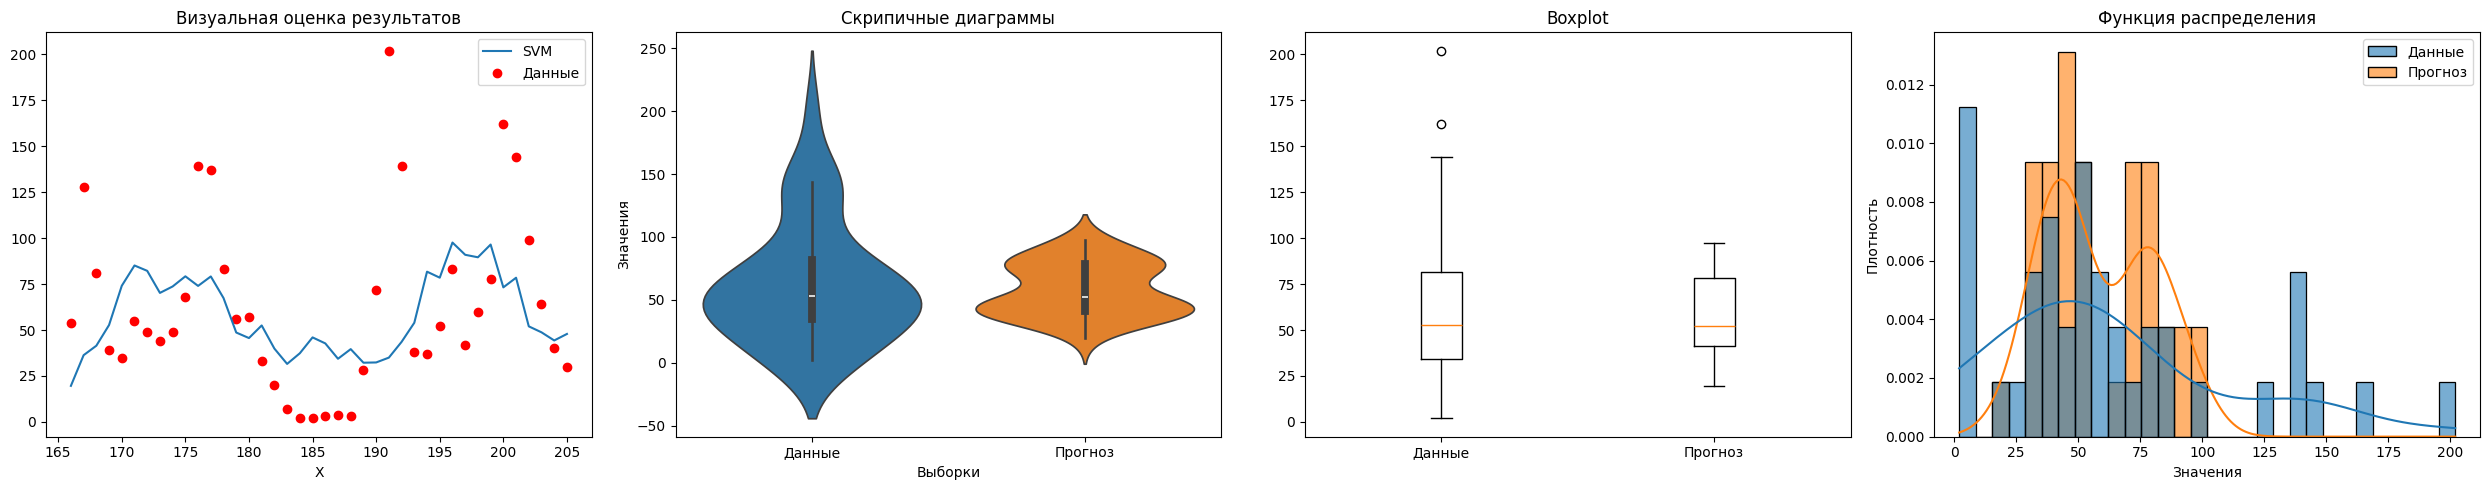

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs[0].plot(X_test['hours'], res_svm, label='SVM')
axs[0].scatter(X_test['hours'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': res_svm
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

axs[2].boxplot([ y_test, res_svm])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'Прогноз'])

sns.histplot(data, bins=30, kde=True, stat='density', color='blue', alpha=0.6, ax=axs[3])
axs[3].set_title('Функция распределения')
axs[3].set_ylabel('Плотность')
axs[3].set_xlabel('Значения')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

По графиками можно сравнить характеристики разброса значений:

Медианные значения прогноза приблизительно на одном уровне, границы квантилей сдвинуты, "границы усов" — границы статистически значимой выборки, тоже сдвинуты, разброс значений по прогнозу меньше, чем реальные значения, в исходных данных наблюдаются выбросы.

Плотность прогнозируемых данных имеет менее высокую дисперсию, тогда как среднее значение по группам кажется приблизительно одинаковым.

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [ ]:
from scipy.stats import stats

# Приведение y_test к той же сумме, что и res_svm
y_test_normalized = y_test / np.sum(y_test) * np.sum(res_svm)

# Выполнение теста согласия Пирсона
chi2_statistic, p_value = stats.chisquare(f_obs=res_svm, f_exp=y_test_normalized)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается: выборки имеют разные распределения.")
else:
    print("Нулевая гипотеза не отвергается: выборки имеют схожие распределения.")

Статистика хи-квадрат: 3976.692969377086
p-value: 0.0
Нулевая гипотеза отвергается: выборки имеют разные распределения.


<ipython-input-18-5eaf30175ee0>:7: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_statistic, p_value = stats.chisquare(f_obs=res_svm, f_exp=y_test_normalized)


In [ ]:
# тест Фишера

# Выполнение F-теста
f_statistic, p_value = stats.f_oneway(res_svm, y_test)

# Вывод результатов
print(f"Статистика F: {f_statistic}")
print(f"P-значение: {p_value}")

Статистика F: 0.31649956283655034
P-значение: 0.5753323122444189


<ipython-input-19-63aed327aba8>:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_statistic, p_value = stats.f_oneway(res_svm, y_test)


In [ ]:
#парный t-тест Стьюдента

t_statistic, p_value = stats.ttest_rel(y_test, res_svm)
print(f"Результат t-теста: {t_statistic}")
print(f"p-value: {p_value}")

Результат t-теста: 0.6103590036522173
p-value: 0.5451645931707418


<ipython-input-20-5643298e8926>:3: DeprecationWarning: Please import `ttest_rel` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic, p_value = stats.ttest_rel(y_test, res_svm)


Результат t-теста: 0.61 указывает на то, что среднее исходных значений выше среднего предсказанных

p-value: 0.55 > 0.05, поэтому нет оснований отвергнуть нулевую гипотезу. Это означает, что хотя среднее предсказанное значение немного выше среднего реального значения, эта разница не является статистически значимой

#### Метрики

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_svm)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_svm)
MAE = mean_absolute_error(y_test, res_svm)
MAPE = mean_absolute_percentage_error(y_test, res_svm)
print(f"MSE={MSE:.2f}, RMSE={RMSE:.2f}, R2={R2:.2f}, MAE={MAE:.2f}, MAPE={MAPE:.3%}")

MSE=2325.82, RMSE=48.23, R2=-0.03, MAE=37.38, MAPE=234.687%


#### Критерии для проверки нормальности распределения
- **Критерий Мизеса:** если p-значение меньше уровня значимости (например, 0.05), мы отвергаем гипотезу о нормальности. Это указывает на то, что данные не распределены нормально.
- **Критерий Андерсона-Дарлинга:** результаты будут включать статистику теста и критические значения для различных уровней значимости (обычно 0.15, 0.10, 0.05, 0.025, 0.01). Если тестовая статистика превышает критическое значение для выбранного уровня значимости, мы отвергаем гипотезу о нормальности.
- **Критерий Шапиро-Франсиа:** если p-значение меньше 0.05, данные не нормально распределены.
- **Критерий Лилифорса:** p-значение < 0.05 указывает на отклонение от нормального распределения.

#### Критерии проверки однородности выборок
- **Критерий Вилкоксона:** если p-значение меньше 0.05, то мы отвергаем гипотезу о том, что два связанных выборки имеют одинаковое распределение. Это указывает на то, что есть статистически значимые различия между выборками.

#### Критреии сравнения масштаба
- **Критерий Ансари-Брэдли:** тест проверяет, равны ли дисперсии двух выборок. p-значение < 0.05 указывает на неравенство дисперсий.
- **Критерий Муда:** данный критерий также проверяет равенство распределений. Интерпретация аналогична предыдущим тестам: p-значение < 0.05 говорит о наличии различий.


In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import wilcoxon

# Критерии проверки однородности выборок
print(f'Критерий Вилкоксона {wilcoxon(y_test, res_svm)}')

# Критреии сравнения масштаба
print(f'Критерий Ансари-Брэдли {stats.ansari(y_test, res_svm)}')

Критерий Вилкоксона WilcoxonResult(statistic=394.0, pvalue=0.8367550107286661)
Критерий Ансари-Брэдли AnsariResult(statistic=708.0, pvalue=0.031068106534607735)


### kNN



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7)
model.fit(np.array(X_train), np.array(y_train))
res_knn = model.predict(np.array(X_test))

#### Визуальный анализ


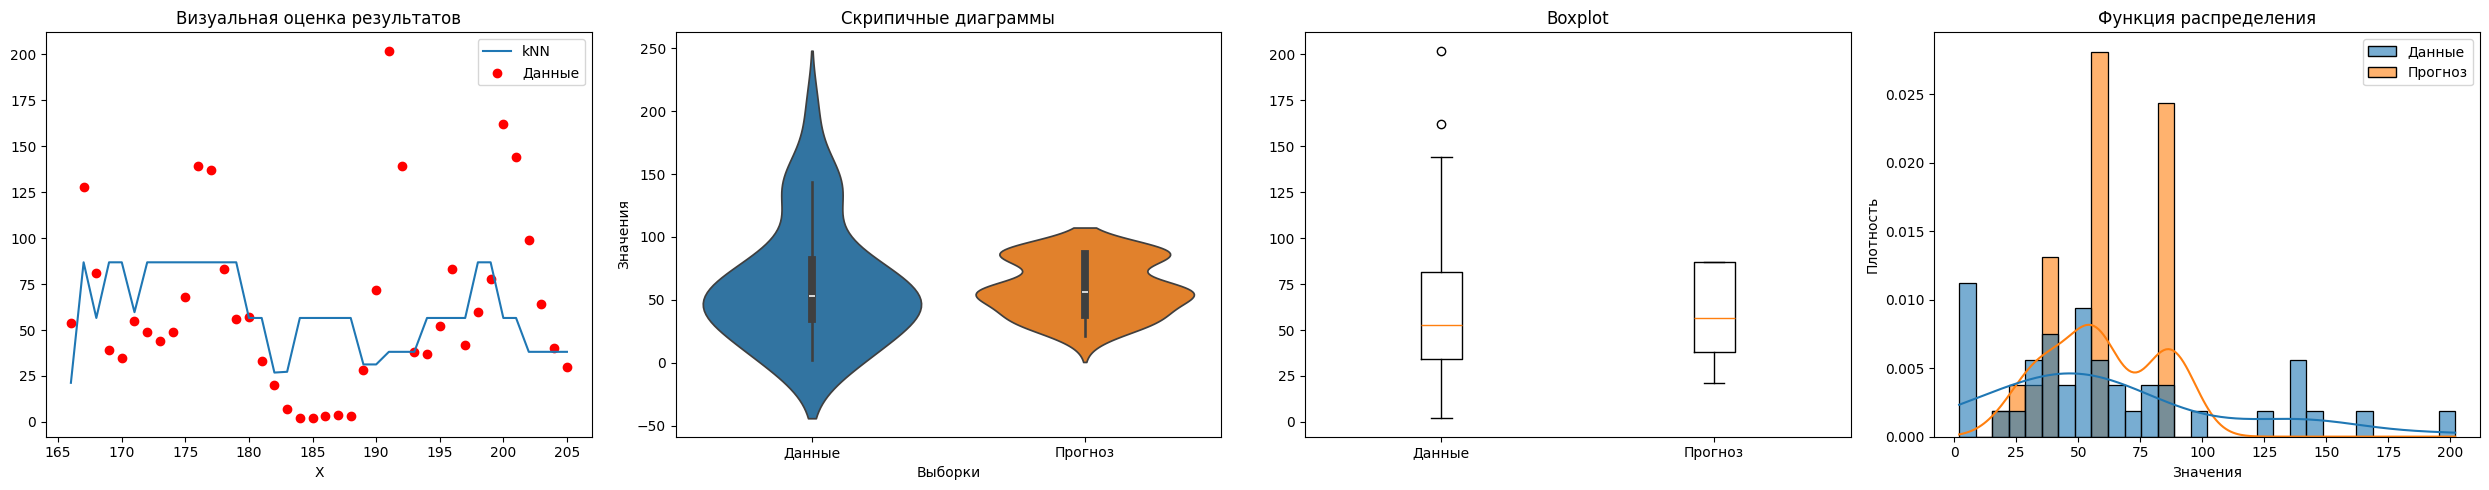

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs[0].plot(X_test['hours'], res_knn, label='kNN')
axs[0].scatter(X_test['hours'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': res_knn
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

axs[2].boxplot([ y_test, res_knn])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'Прогноз'])

sns.histplot(data, bins=30, kde=True, stat='density', color='blue', alpha=0.6, ax=axs[3])
axs[3].set_title('Функция распределения')
axs[3].set_ylabel('Плотность')
axs[3].set_xlabel('Значения')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [ ]:
from scipy.stats import stats

# Приведение y_test к той же сумме, что и res_knn
y_test_normalized = y_test / np.sum(y_test) * np.sum(res_knn)

# Выполнение теста согласия Пирсона
chi2_statistic, p_value = stats.chisquare(f_obs=res_knn, f_exp=y_test_normalized)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается: выборки имеют разные распределения.")
else:
    print("Нулевая гипотеза не отвергается: выборки имеют схожие распределения.")

Статистика хи-квадрат: 6784.900083220038
p-value: 0.0
Нулевая гипотеза отвергается: выборки имеют разные распределения.


<ipython-input-26-81f30612fe25>:7: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_statistic, p_value = stats.chisquare(f_obs=res_knn, f_exp=y_test_normalized)


In [ ]:
# тест Фишера

# Выполнение F-теста
f_statistic, p_value = stats.f_oneway(res_knn, y_test)

# Вывод результатов
print(f"Статистика F: {f_statistic}")
print(f"P-значение: {p_value}")

Статистика F: 0.1562644268964105
P-значение: 0.6936983620882307


<ipython-input-27-9df603cb5dad>:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_statistic, p_value = stats.f_oneway(res_knn, y_test)


In [ ]:
#парный t-тест Стьюдента

t_statistic, p_value = stats.ttest_rel(y_test, res_knn)
print(f"Результат t-теста: {t_statistic}")
print(f"p-value: {p_value}")

Результат t-теста: 0.4154025324083072
p-value: 0.6801239341184533


<ipython-input-28-076e78c3adff>:3: DeprecationWarning: Please import `ttest_rel` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic, p_value = stats.ttest_rel(y_test, res_knn)


Результат t-теста: 0.42 указывает на то, что среднее исходных значений немного выше среднего предсказанных

p-value: 0.68 > 0.05, поэтому нет оснований отвергнуть нулевую гипотезу. Это означает, что хотя среднее предсказанное значение выше среднего реального значения, эта разница не является статистически значимой

#### Метрики

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_knn)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_knn)
MAE = mean_absolute_error(y_test, res_knn)
MAPE = mean_absolute_percentage_error(y_test, res_knn)
print(f"MSE={MSE:.2f}, RMSE={RMSE:.2f}, R2={R2:.2f}, MAE={MAE:.2f}, MAPE={MAPE:.3%}")

MSE=2477.49, RMSE=49.77, R2=-0.09, MAE=37.41, MAPE=305.527%


#### Критерии для проверки нормальности распределения
- **Критерий Мизеса:** если p-значение меньше уровня значимости (например, 0.05), мы отвергаем гипотезу о нормальности. Это указывает на то, что данные не распределены нормально.
- **Критерий Андерсона-Дарлинга:** результаты будут включать статистику теста и критические значения для различных уровней значимости (обычно 0.15, 0.10, 0.05, 0.025, 0.01). Если тестовая статистика превышает критическое значение для выбранного уровня значимости, мы отвергаем гипотезу о нормальности.
- **Критерий Шапиро-Франсиа:** если p-значение меньше 0.05, данные не нормально распределены.
- **Критерий Лилифорса:** p-значение < 0.05 указывает на отклонение от нормального распределения.

#### Критерии проверки однородности выборок
- **Критерий Вилкоксона:** если p-значение меньше 0.05, то мы отвергаем гипотезу о том, что два связанных выборки имеют одинаковое распределение. Это указывает на то, что есть статистически значимые различия между выборками.

#### Критреии сравнения масштаба
- **Критерий Ансари-Брэдли:** тест проверяет, равны ли дисперсии двух выборок. p-значение < 0.05 указывает на неравенство дисперсий.
- **Критерий Муда:** данный критерий также проверяет равенство распределений. Интерпретация аналогична предыдущим тестам: p-значение < 0.05 говорит о наличии различий.


In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import wilcoxon

# Критерии проверки однородности выборок
print(f'Критерий Вилкоксона {wilcoxon(y_test, res_knn)}')

# Критреии сравнения масштаба
print(f'Критерий Ансари-Брэдли {stats.ansari(y_test, res_knn)}')

Критерий Вилкоксона WilcoxonResult(statistic=374.0, pvalue=0.6367651425298391)
Критерий Ансари-Брэдли AnsariResult(statistic=693.0, pvalue=0.02254644054456779)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Ties preclude use of exact statistic.
  res = hypotest_fun_out(*samples, **kwds)


### Lasso



In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.05)
model.fit(np.array(X_train), np.array(y_train))
res_lasso = model.predict(np.array(X_test))

#### Визуальный анализ


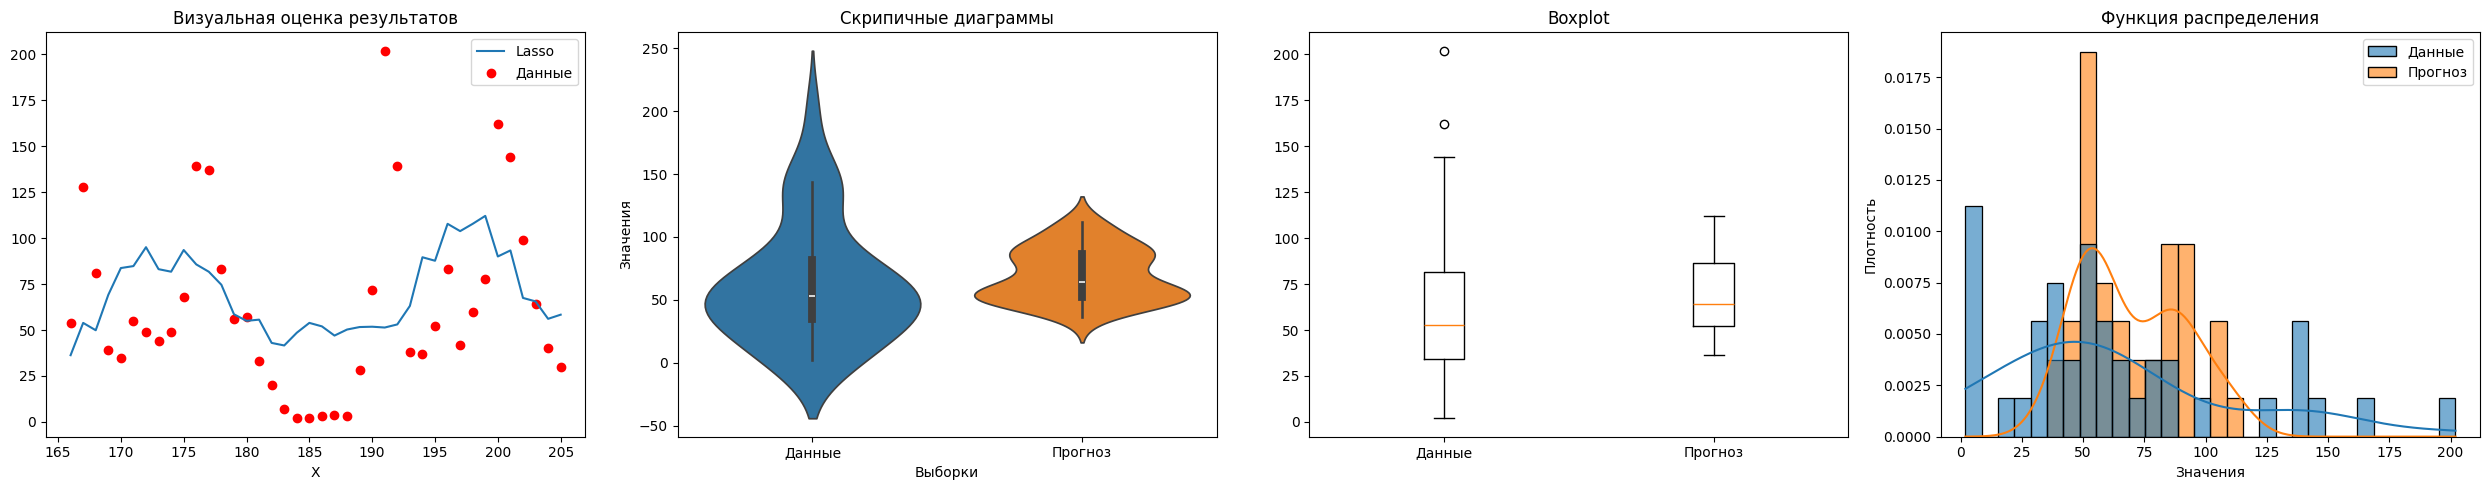

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs[0].plot(X_test['hours'], res_lasso, label='Lasso')
axs[0].scatter(X_test['hours'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': res_lasso
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

axs[2].boxplot([ y_test, res_lasso])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'Прогноз'])

sns.histplot(data, bins=30, kde=True, stat='density', color='blue', alpha=0.6, ax=axs[3])
axs[3].set_title('Функция распределения')
axs[3].set_ylabel('Плотность')
axs[3].set_xlabel('Значения')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [ ]:
from scipy.stats import stats

# Приведение y_test к той же сумме, что и res_lasso
y_test_normalized = y_test / np.sum(y_test) * np.sum(res_lasso)

# Выполнение теста согласия Пирсона
chi2_statistic, p_value = stats.chisquare(f_obs=res_lasso, f_exp=y_test_normalized)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается: выборки имеют разные распределения.")
else:
    print("Нулевая гипотеза не отвергается: выборки имеют схожие распределения.")

Статистика хи-квадрат: 4958.041781234799
p-value: 0.0
Нулевая гипотеза отвергается: выборки имеют разные распределения.


<ipython-input-33-7b71f2b36360>:7: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_statistic, p_value = stats.chisquare(f_obs=res_lasso, f_exp=y_test_normalized)


In [ ]:
# тест Фишера

# Выполнение F-теста
f_statistic, p_value = stats.f_oneway(res_lasso, y_test)

# Вывод результатов
print(f"Статистика F: {f_statistic}")
print(f"P-значение: {p_value}")

Статистика F: 0.665738311734541
P-значение: 0.4170261374288641


<ipython-input-34-b12b15c4b96b>:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_statistic, p_value = stats.f_oneway(res_lasso, y_test)


F = 0.67 < 1, значит, модель не объясняет значительную часть дисперсии. В данном случае P-значение (0.417) значительно выше 0.05, что указывает на то, что нет оснований отвергать нулевую гипотезу.

In [ ]:
#парный t-тест Стьюдента

t_statistic, p_value = stats.ttest_rel(y_test, res_lasso)
print(f"Результат t-теста: {t_statistic}")
print(f"p-value: {p_value}")

Результат t-теста: -0.9069273204072701
p-value: 0.3700149907875515


<ipython-input-35-34209a879c3d>:3: DeprecationWarning: Please import `ttest_rel` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic, p_value = stats.ttest_rel(y_test, res_lasso)


Результат t-теста: -0.91 указывает на то, что среднее исходных значений немного выше среднего предсказанных

p-value: 0.37 > 0.05, поэтому нет оснований отвергнуть нулевую гипотезу. Это означает, что хотя среднее предсказанное значение ниже среднего реального значения, эта разница не является статистически значимой

#### Метрики

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_lasso)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_lasso)
MAE = mean_absolute_error(y_test, res_lasso)
MAPE = mean_absolute_percentage_error(y_test, res_lasso)
print(f"MSE={MSE:.2f}, RMSE={RMSE:.2f}, R2={R2:.2f}, MAE={MAE:.2f}, MAPE={MAPE:.3%}")

MSE=2232.33, RMSE=47.25, R2=0.02, MAE=39.43, MAPE=293.548%


#### Критерии для проверки нормальности распределения
- **Критерий Мизеса:** если p-значение меньше уровня значимости (например, 0.05), мы отвергаем гипотезу о нормальности. Это указывает на то, что данные не распределены нормально.
- **Критерий Андерсона-Дарлинга:** результаты будут включать статистику теста и критические значения для различных уровней значимости (обычно 0.15, 0.10, 0.05, 0.025, 0.01). Если тестовая статистика превышает критическое значение для выбранного уровня значимости, мы отвергаем гипотезу о нормальности.
- **Критерий Шапиро-Франсиа:** если p-значение меньше 0.05, данные не нормально распределены.
- **Критерий Лилифорса:** p-значение < 0.05 указывает на отклонение от нормального распределения.

#### Критерии проверки однородности выборок
- **Критерий Вилкоксона:** если p-значение меньше 0.05, то мы отвергаем гипотезу о том, что два связанных выборки имеют одинаковое распределение. Это указывает на то, что есть статистически значимые различия между выборками.

#### Критреии сравнения масштаба
- **Критерий Ансари-Брэдли:** тест проверяет, равны ли дисперсии двух выборок. p-значение < 0.05 указывает на неравенство дисперсий.
- **Критерий Муда:** данный критерий также проверяет равенство распределений. Интерпретация аналогична предыдущим тестам: p-значение < 0.05 говорит о наличии различий.


In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import wilcoxon

# Критерии проверки однородности выборок
print(f'Критерий Вилкоксона {wilcoxon(y_test, res_lasso)}')

# Критреии сравнения масштаба
print(f'Критерий Ансари-Брэдли {stats.ansari(y_test, res_lasso)}')

Критерий Вилкоксона WilcoxonResult(statistic=308.0, pvalue=0.17435350978121278)
Критерий Ансари-Брэдли AnsariResult(statistic=666.0, pvalue=0.003029053339366551)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Ties preclude use of exact statistic.
  res = hypotest_fun_out(*samples, **kwds)


### PLS



In [ ]:
from sklearn.cross_decomposition import PLSRegression

model = PLSRegression(n_components=3)
model.fit(np.array(X_train), np.array(y_train))
res_pls = model.predict(np.array(X_test))

#### Визуальный анализ


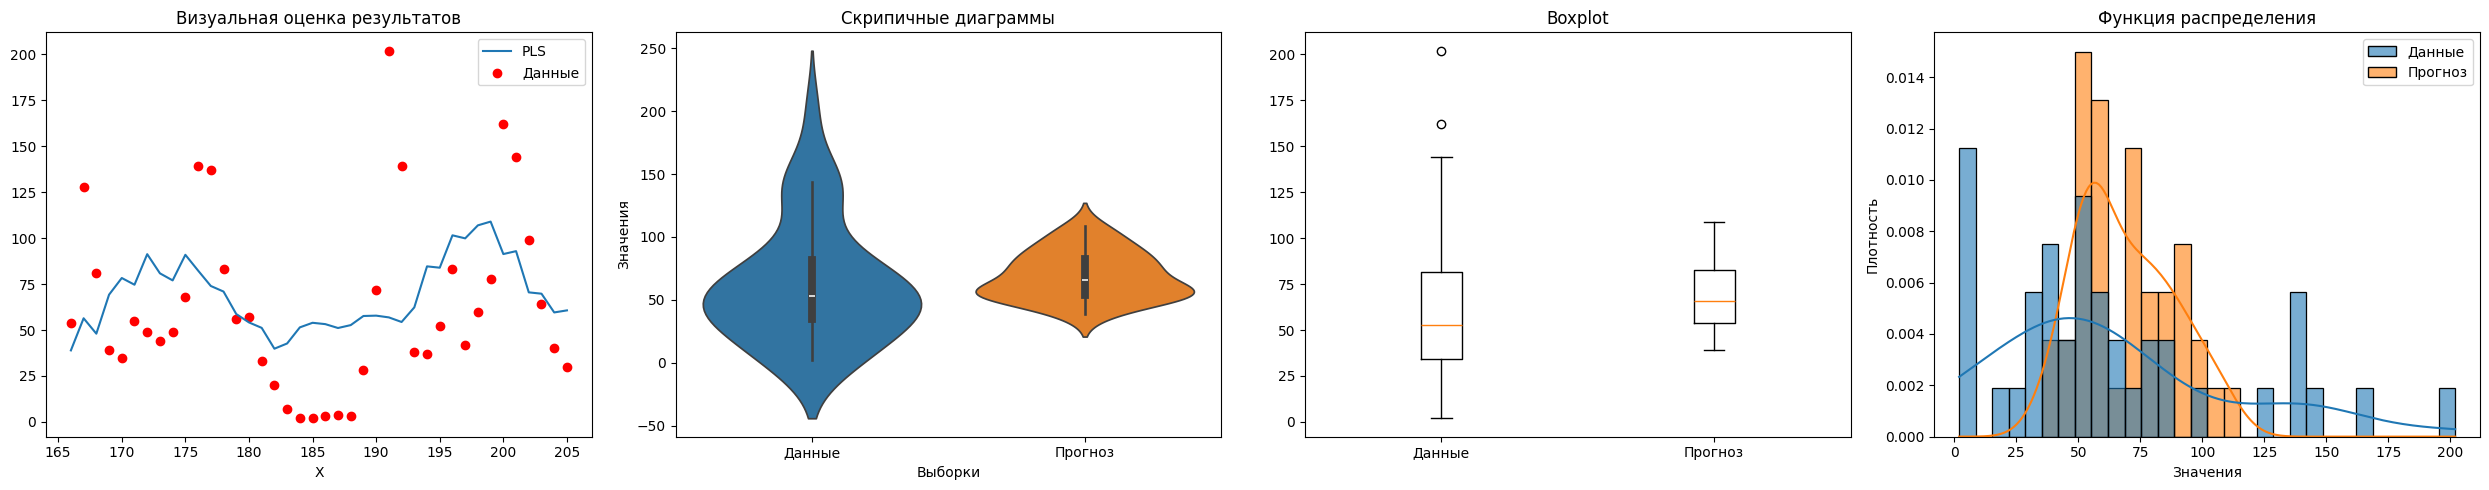

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
axs[0].plot(X_test['hours'], res_pls, label='PLS')
axs[0].scatter(X_test['hours'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('X')

# Второй подграфик: скрипичная диаграмма
data = pd.DataFrame({
    'Данные': y_test,
    'Прогноз': res_pls
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

axs[2].boxplot([ y_test, res_pls])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'Прогноз'])

sns.histplot(data, bins=30, kde=True, stat='density', color='blue', alpha=0.6, ax=axs[3])
axs[3].set_title('Функция распределения')
axs[3].set_ylabel('Плотность')
axs[3].set_xlabel('Значения')

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [ ]:
from scipy.stats import stats

# Приведение y_test к той же сумме, что и res_pls
y_test_normalized = y_test / np.sum(y_test) * np.sum(res_pls)

# Выполнение теста согласия Пирсона
chi2_statistic, p_value = stats.chisquare(f_obs=res_pls, f_exp=y_test_normalized)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_statistic}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается: выборки имеют разные распределения.")
else:
    print("Нулевая гипотеза не отвергается: выборки имеют схожие распределения.")

Статистика хи-квадрат: 5272.8370787667955
p-value: 0.0
Нулевая гипотеза отвергается: выборки имеют разные распределения.


<ipython-input-40-4d70e739cc5a>:7: DeprecationWarning: Please import `chisquare` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  chi2_statistic, p_value = stats.chisquare(f_obs=res_pls, f_exp=y_test_normalized)


In [ ]:
# тест Фишера

# Выполнение F-теста
f_statistic, p_value = stats.f_oneway(res_pls, y_test)

# Вывод результатов
print(f"Статистика F: {f_statistic}")
print(f"P-значение: {p_value}")

Статистика F: 0.5535008187594079
P-значение: 0.4591261599052311


<ipython-input-41-1fa80e0d45fd>:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_statistic, p_value = stats.f_oneway(res_pls, y_test)


F = 0.55 < 1, значит, модель не объясняет значительную часть дисперсии. В данном случае P-значение (0.4591) значительно выше 0.05, что указывает на то, что нет оснований отвергать нулевую гипотезу.

In [ ]:
#парный t-тест Стьюдента

t_statistic, p_value = stats.ttest_rel(y_test, res_pls)
print(f"Результат t-теста: {t_statistic}")
print(f"p-value: {p_value}")

Результат t-теста: -0.8302584631192039
p-value: 0.4114464330029193


<ipython-input-42-50d90475c399>:3: DeprecationWarning: Please import `ttest_rel` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_statistic, p_value = stats.ttest_rel(y_test, res_pls)


Результат t-теста: -0.83 указывает на то, что среднее исходных значений немного ниже среднего предсказанных.

p-value: 0.41 > 0.05, поэтому нет оснований отвергнуть нулевую гипотезу. Это означает, что хотя среднее предсказанное значение ниже среднего реального значения, эта разница не является статистически значимой.

#### Метрики

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_pls)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_pls)
MAE = mean_absolute_error(y_test, res_pls)
MAPE = mean_absolute_percentage_error(y_test, res_pls)
print(f"MSE={MSE:.2f}, RMSE={RMSE:.2f}, R2={R2:.2f}, MAE={MAE:.2f}, MAPE={MAPE:.3%}")

MSE=2139.64, RMSE=46.26, R2=0.06, MAE=38.51, MAPE=300.862%


#### Критерии для проверки нормальности распределения
- **Критерий Мизеса:** если p-значение меньше уровня значимости (например, 0.05), мы отвергаем гипотезу о нормальности. Это указывает на то, что данные не распределены нормально.
- **Критерий Андерсона-Дарлинга:** результаты будут включать статистику теста и критические значения для различных уровней значимости (обычно 0.15, 0.10, 0.05, 0.025, 0.01). Если тестовая статистика превышает критическое значение для выбранного уровня значимости, мы отвергаем гипотезу о нормальности.
- **Критерий Шапиро-Франсиа:** если p-значение меньше 0.05, данные не нормально распределены.
- **Критерий Лилифорса:** p-значение < 0.05 указывает на отклонение от нормального распределения.

#### Критерии проверки однородности выборок
- **Критерий Вилкоксона:** если p-значение меньше 0.05, то мы отвергаем гипотезу о том, что два связанных выборки имеют одинаковое распределение. Это указывает на то, что есть статистически значимые различия между выборками.

#### Критреии сравнения масштаба
- **Критерий Ансари-Брэдли:** тест проверяет, равны ли дисперсии двух выборок. p-значение < 0.05 указывает на неравенство дисперсий.
- **Критерий Муда:** данный критерий также проверяет равенство распределений. Интерпретация аналогична предыдущим тестам: p-значение < 0.05 говорит о наличии различий.


In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import wilcoxon

# Критерии проверки однородности выборок
print(f'Критерий Вилкоксона {wilcoxon(y_test, res_pls)}')

# Критреии сравнения масштаба
print(f'Критерий Ансари-Брэдли {stats.ansari(y_test, res_pls)}')

Критерий Вилкоксона WilcoxonResult(statistic=309.0, pvalue=0.17869641572360706)
Критерий Ансари-Брэдли AnsariResult(statistic=633.0, pvalue=0.0003181159226226744)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Ties preclude use of exact statistic.
  res = hypotest_fun_out(*samples, **kwds)


### Интерпретация результатов

\begin{array}{|c|c|} \hline
 & МНК & SVM & kNN & Lasso & PLS \\ \hline
RMSE & 47.27 & 48.23 & 49.77 & 47.25 & 46.26 \\ \hline
R^2 & 0.02 & -0.03 & -0.09 & 0.02 & 0.06 \\\hline
MAE & 39.46 & 37.38 & 37.41 & 39.43 & 38.51 \\ \hline
Fтест & 0.68 & 0.32 & 0.16 & 0.67 & 0.55\\ \hline
tтест & -0.91 & 0.61 & 0.42 & -0.91 & -0.83\\ \hline
χ^2 & 4957.8 & 3976.7 & 6784.9 & 4958.0 & 5272.8 \\ \hline
\end{array}

RMSE показывает среднюю ошибку предсказаний модели. PLS имеет наименьшую среднюю ошибку, что указывает на лучшую предсказательную способность в данном случае, Lasso и MНК также показали себя неплох.

Все представленные модели демонстрируют слабые показатели коэффициента детерминации, что указывает на недостаточную способность моделей объяснять изменения в данных.

MAE также является метрикой ошибки, которая показывает, насколько близко предсказания к фактическим значениям. В этом случае SVM имеет наименьшее значение MAE, следуемое за kNN, что говорит о том, что обе эти модели приблизительно одинаково хороши по сравнению с остальными моделями, хотя их RMSE выше.

МНК и Lasso выглядят наиболее значимыми, и они показывают схожие значения.

t-тест позволяет проанализировать значимость коэффициентов в модели. Значения, приближающиеся к нулю, указывают на нехватку значимости. MНК и Lasso имеют одинаковые и негативные значения, что может указывать на проблемы в их предсказательной способности. Модели SVM и kNN имеют положительные значения, но они тоже недостаточно высокие.

$χ^2$ используется для проверки соответствия модели и данных. Чем ниже значение, тем лучше модель соответствует данным. Здесь SVM имеет наименьшее значение, что делает ее наиболее подходящей по сравнению с другими моделями.




На основе метрик будто бы PLS является наиболее предпочтительной для задачи. Хуже всего SVM и kNN - они демонстрируют низкую точность и значимость.